<a href="https://colab.research.google.com/github/Prathamesh-Shanbhag/MLDLS2021/blob/main/Clustering_on_Anime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***K-Means Clustering***

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
dataset = pd.read_csv("anime.csv")
print(dataset)

     anime_id  rating
0       32281    9.37
1        5114    9.26
2       28977    9.25
3        9253    9.17
4        9969    9.16
..        ...     ...
327     24997    8.18
328     32902    8.18
329      8063    8.18
330     25879    8.18
331       889    8.17

[332 rows x 2 columns]


Using only 2 columns so that data visualization is possible.

In [33]:
X = dataset.iloc[:,:].values
x1= dataset.iloc[:,0].values
x2= dataset.iloc[:,1].values
print(x1,x2)

[32281  5114 28977  9253  9969 32935 11061   820 15335 15417  4181 28851
   918  2904 28891   199 23273 24701 12355  1575   263    44     1 30276
   164  7311 17074 21939   457  2001   245 32983  5258 28957 11665   431
 11741 31757    19 12365  1535 32366 30654 20583 19647  4282 10379 22135
 21329 31043  7785  3297 30709  6114 31240  4565  5300  9989 24415 11577
 10408 28171 32995 21899 26055  7472   777 22535 28735 12431 28805   578
 16894  5028    21   801 31933  5205 17389   170 10162 18617 32182   877
  2251 24687 16498 10030  5941 30346  3784 13125 12029 14397 10087 14719
  9756 10165 13601 22789 30230 18115 11981 11917   205 32282  6594 11979
  7655  2246 25835  2921   136 30503 12531   523   467   572 19815  2559
   392   486 11771  1698  5341 25781 10863 28701  5420  9260    32  4224
  2236  2685 31181    45  2418  1365 22297   627 10937 23755  4081  4155
  1889   137   139 23317   558  5040    57    33     5  1842  6336 20651
  1210   338 13759  6547  5081 32867   264 12859   

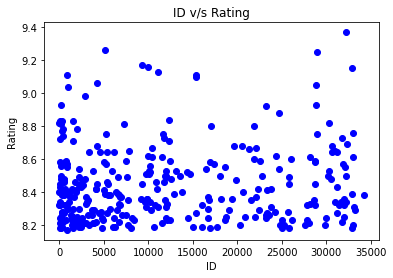

In [34]:
# Visualizing the data using matplotlib.pyplot On a 2D Graph
plt.xlabel('ID')
plt.ylabel('Rating')
plt.title('ID v/s Rating')
plt.scatter(x1,x2,color='blue')

In [35]:
from sklearn.cluster import KMeans
# Number of clusters
#This will remove all Nan & Infinity values on which Kmeans cannot work
dataset.fillna(-99999, inplace=True)
kmeans = KMeans(n_clusters=3)
# Getting the cluster labels
labels = kmeans.fit_predict(dataset)
dataset["KMeans"]= labels
# Centroid values
centroids = kmeans.cluster_centers_
print("Centroid values")
print(centroids) 


Centroid values
[[2.56464671e+03 8.41179641e+00]
 [2.77482674e+04 8.47325581e+00]
 [1.32494557e+04 8.46227848e+00]]


In [36]:
print(dataset)

     anime_id  rating  KMeans
0       32281    9.37       1
1        5114    9.26       0
2       28977    9.25       1
3        9253    9.17       2
4        9969    9.16       2
..        ...     ...     ...
327     24997    8.18       1
328     32902    8.18       1
329      8063    8.18       2
330     25879    8.18       1
331       889    8.17       0

[332 rows x 3 columns]


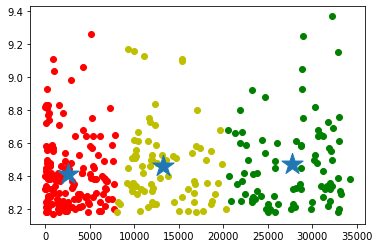

In [38]:
k=3
#plotting the clusters
colors = ['r', 'g', 'y']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
#plotting the centroids        
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=500)


# ***BIRCH***
BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.
It is implemented via the Birch class and the main configuration to tune is the “threshold” and “n_clusters” hyperparameters, the latter of which provides an estimate of the number of clusters.


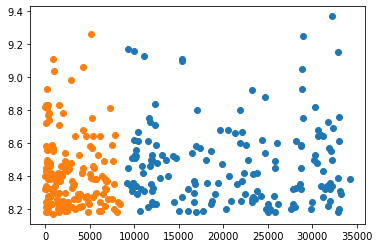

In [45]:
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
y_pred = model.predict(X)
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_pred == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
#Visualize the data on graph
pyplot.show()